# Using Predictive Analysis To Predict Diagnosis of a Breast Tumor 
### Identify data sources
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

![Breast Cancer](https://hospitalprofessionalnews.ie/wp-content/uploads/2022/06/Metastatic_breast_cancer.jpg)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import norm
import seaborn as sns 

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, KFold
# from yellowbrick.model_selection import LearningCurve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1. Data cleaning

In [2]:
data = pd.read_csv('Breast Cancer.csv', index_col=False,)

In [3]:
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
# Id column is redundant and not useful, we want to drop it
#data.drop('id', axis =1, inplace=True)

#data.head(2)

In [5]:
data.shape

(569, 32)

In [6]:
# Review data types with "info()".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#check for missing variables
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
diagnosis = {'M': 1,'B': 0}

data.diagnosis = [diagnosis[item] for item in data.diagnosis]

In [9]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.skew()

id                         6.473752
diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1

In [11]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

From the results above, diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign. To apply machine learning algorithms we want to convert the categorical data into Binary data.


In [12]:
data.to_csv('clean-data.csv')

## 2. Exploratory Data Analysis (EDA)

In [13]:
#basic descriptive statistics
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

In [15]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where
* Malignant = 1 (indicates prescence of cancer cells)
* Benign = 0 (indicates abscence)

##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

# 2.1 Unimodal Data Visualizations


Apply 3 techniques that we can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.

<Axes: xlabel='diagnosis', ylabel='count'>

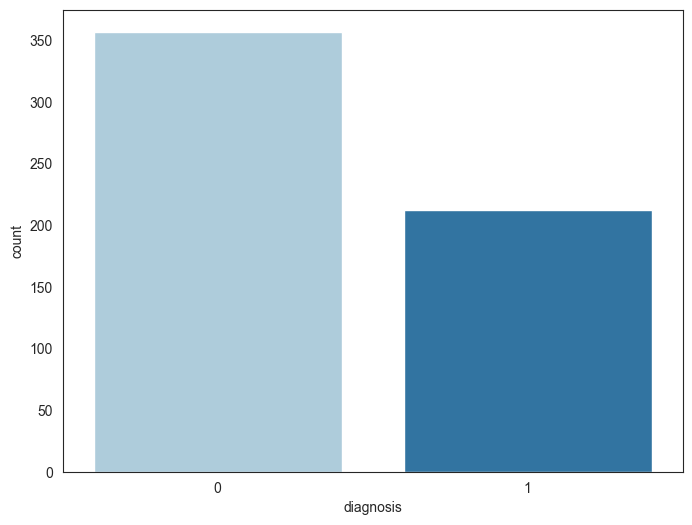

In [16]:
#The frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 6)})
sns.countplot(data['diagnosis'], label='Count', palette="Paired") # 1 for malignant and 0 for benign 

> Break up columns into groups, according to their suffix designation (_mean, _se, and __worst) to perform visualisation plots off. 
> * Join the 'ID' and 'Diagnosis'

In [17]:
data_id_diag = data.loc[:,["id","diagnosis"]]
data_diag = data.loc[:,["diagnosis"]]

In [18]:
#For a merge + slice:
data_mean = data.iloc[:,1:11]
data_se = data.iloc[:,11:22]
data_worst = data.iloc[:,23:]

In [19]:
print(data_id_diag.columns)

Index(['id', 'diagnosis'], dtype='object')


In [20]:
print(data_mean.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')


In [21]:
print(data_se.columns)

Index(['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


In [22]:
print(data_worst.columns)

Index(['texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## 2.1.1 Histogram the "_mean" suffix designition

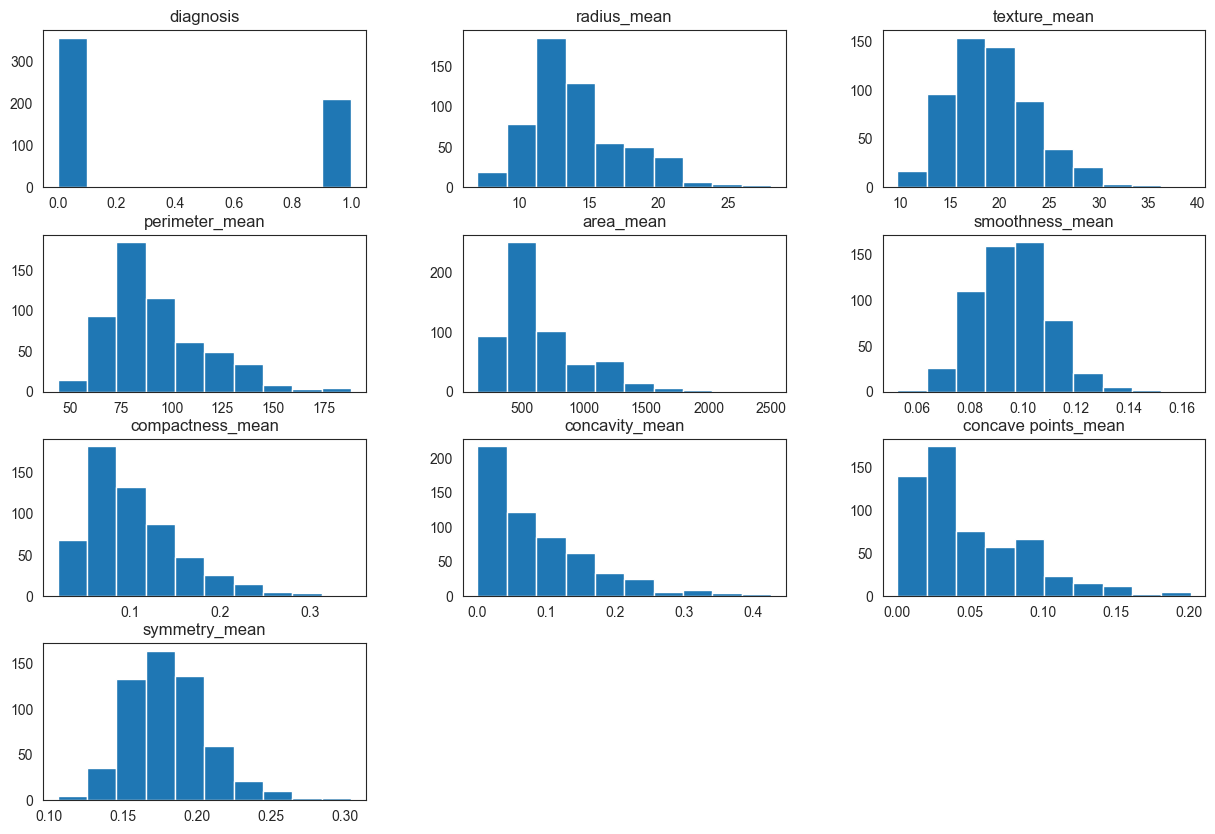

In [23]:
#Plot histograms of CUT1 variables
hist_mean = data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

 >The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
 From the graphs, we can see that **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean** and **concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

### __Histogram for  the "_se" suffix designition__

In [24]:
#Plot histograms of _se variables
# hist_se = data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### __Histogram "_worst" suffix designition__

In [25]:
#Plot histograms of _worst variables
# hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

## 2.1.2 Visualize distribution of data via density plots

### Density plots "_mean" suffix designition

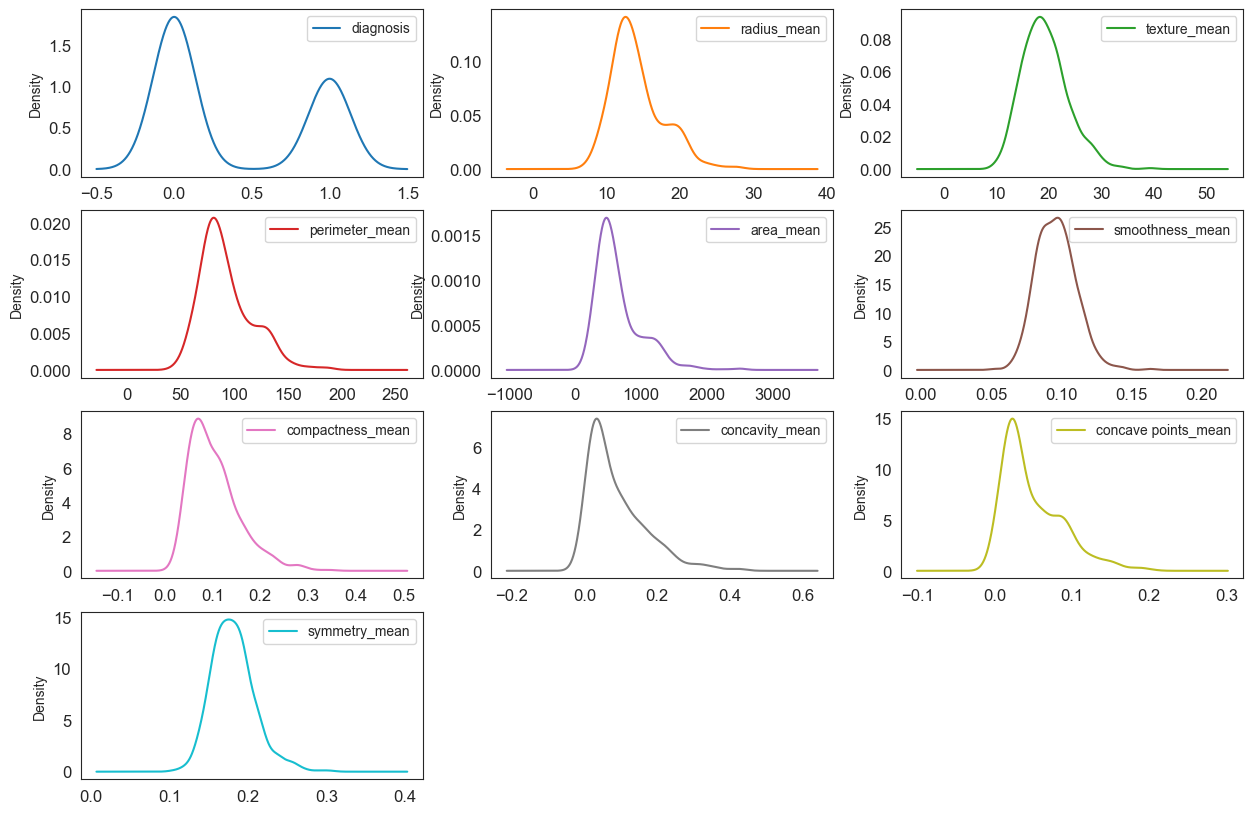

In [26]:
#Density Plots
plt = data_mean.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, 
                     sharey = False, fontsize = 12, figsize = (15,10))

### Density plots "_se" suffix designition

In [27]:
#Density Plots
# plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False,fontsize=12, figsize=(15,10))

### Density plot "_worst" suffix designition

In [28]:
#Density Plots
# plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
#                     figsize=(15,10))

## 2.1.3 Visualise distribution of data via box plots

### Box plot "_mean" suffix designition

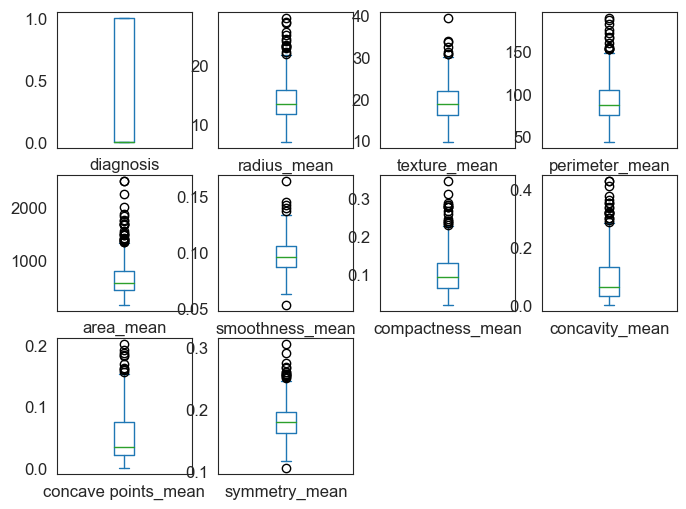

In [29]:
# box and whisker plots
plt = data_mean.plot(kind = 'box' , subplots = True, layout = (3,4), sharex = False, sharey = False, fontsize = 12)

### Box plot "_se" suffix designition

In [30]:
# box and whisker plots
#plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Box plot "_worst" suffix designition

In [31]:
# box and whisker plots
#plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

### Observation
> * We can see that perhaps the attributes perimeter,radius, area, concavity,ompactness may have an exponential distribution( ). 
>* We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution.

# 2.4 Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

In [32]:
sns.set_style("white")

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

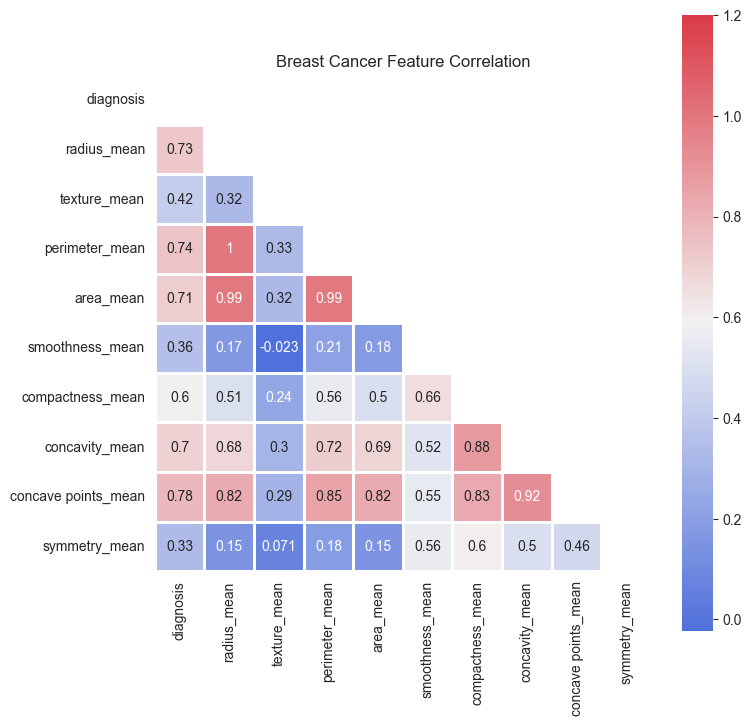

In [33]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g', linewidths=2)

### Observation:
> We can see strong positive relationship exists with mean values paramaters between 1-0.75;.
> * The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter;
> * Some paramters are moderately positive corrlated (r between 0.5-0.75)are concavity and area, concavity and perimeter etc
> * Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, parameter mean values.

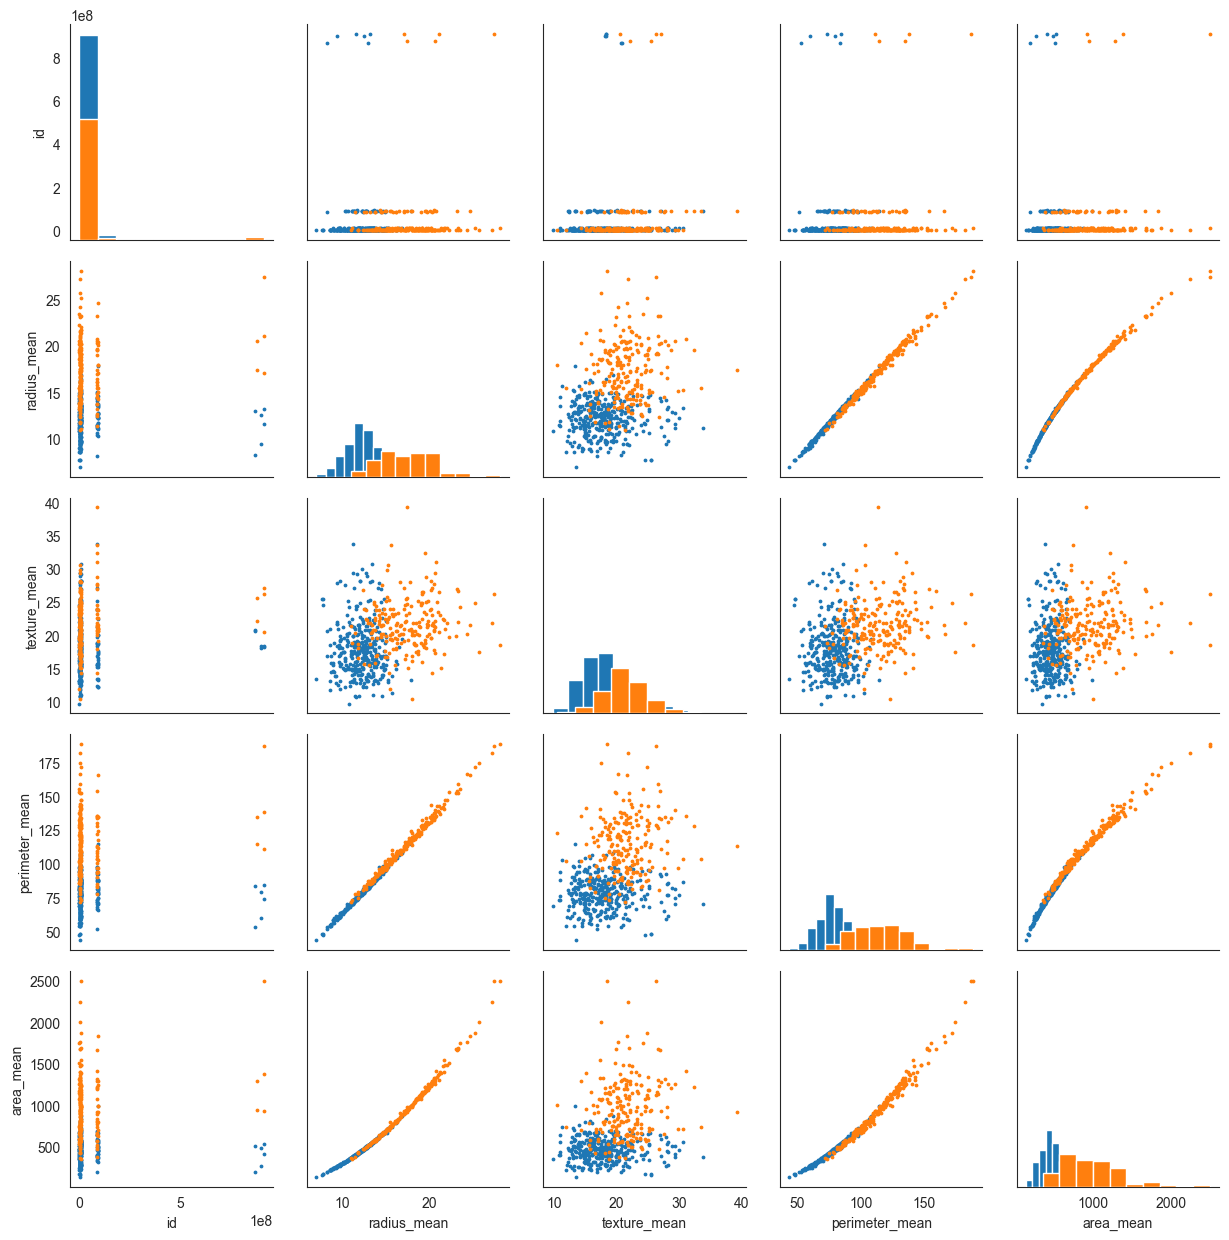

In [34]:
sns.set_style("white")
sns.color_palette("Spectral", as_cmap=True) 

df = pd.read_csv('clean-data.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1], df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### Summary

> * Mean values of cell radius, perimeter, area, compactness, concavity
    and concave points can be used in classification of the cancer. Larger
    values of these parameters tends to show a correlation with malignant
    tumors.
> * mean values of texture, smoothness, symmetry or fractual dimension
    does not show a particular preference of one diagnosis over the other. 
    
> * In any of the histograms there are no noticeable large outliers that warrants further cleanup.

> ### Positively Correlated Features

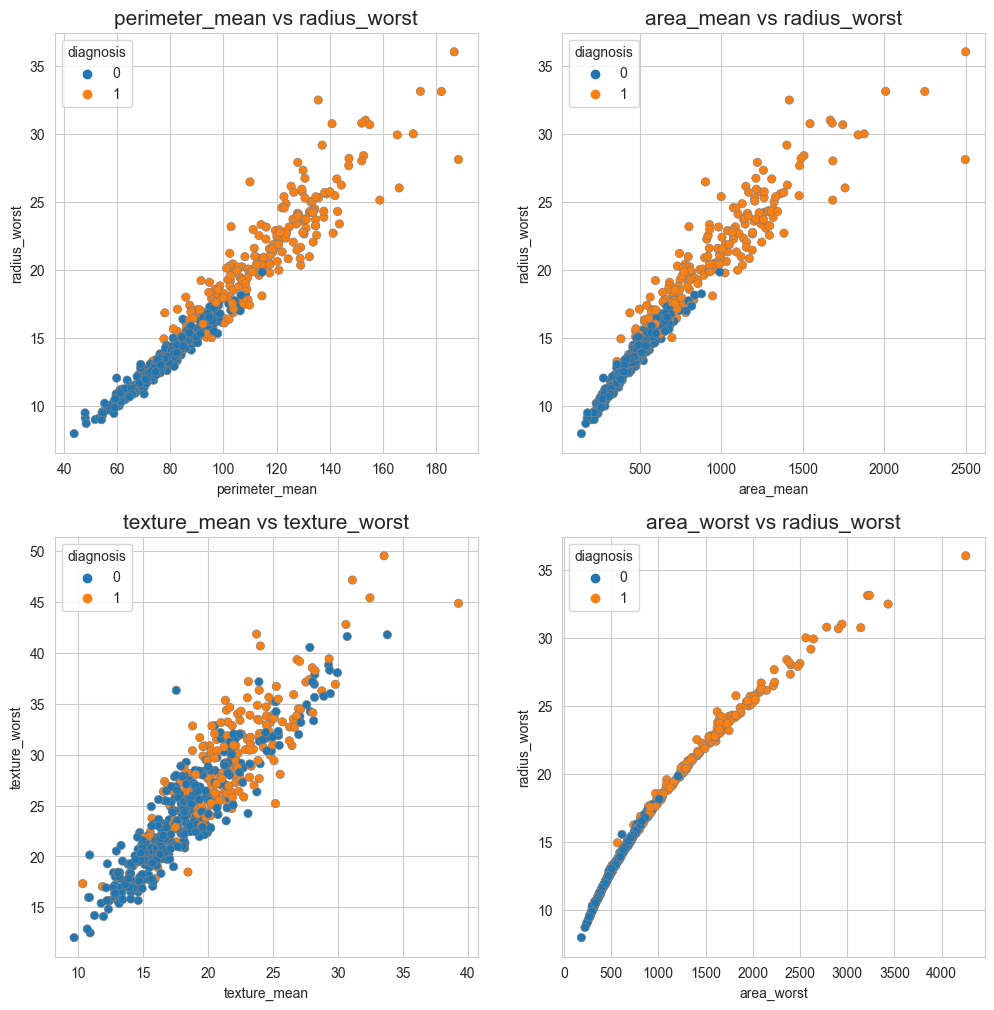

In [35]:
palette = {'0': 'lightblue', '1': 'gold'} # add a color for 'N'
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12, 12))
sns.set_style('whitegrid')
sns.color_palette("bright")

def plot_scatter(a, b, k):
    plt.subplot(k)
    sns.scatterplot(x=df[a], y=df[b], hue="diagnosis",
                    data=df, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b, fontsize=15)
    k += 1

plot_scatter('perimeter_mean', 'radius_worst', 221)   
plot_scatter('area_mean', 'radius_worst', 222)   
plot_scatter('texture_mean', 'texture_worst', 223)   
plot_scatter('area_worst', 'radius_worst', 224)

> ### Negatively Correlated Features

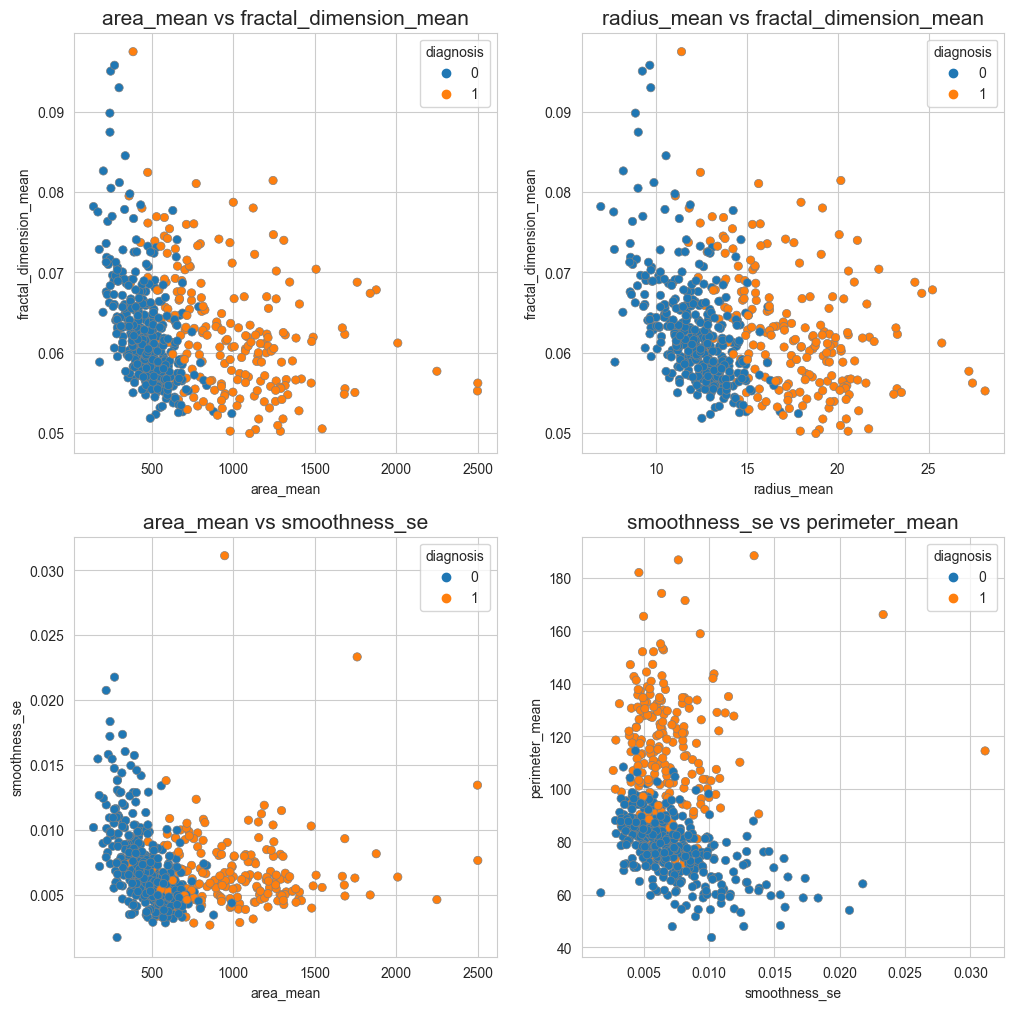

In [36]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

> ### Un-Correlated Features

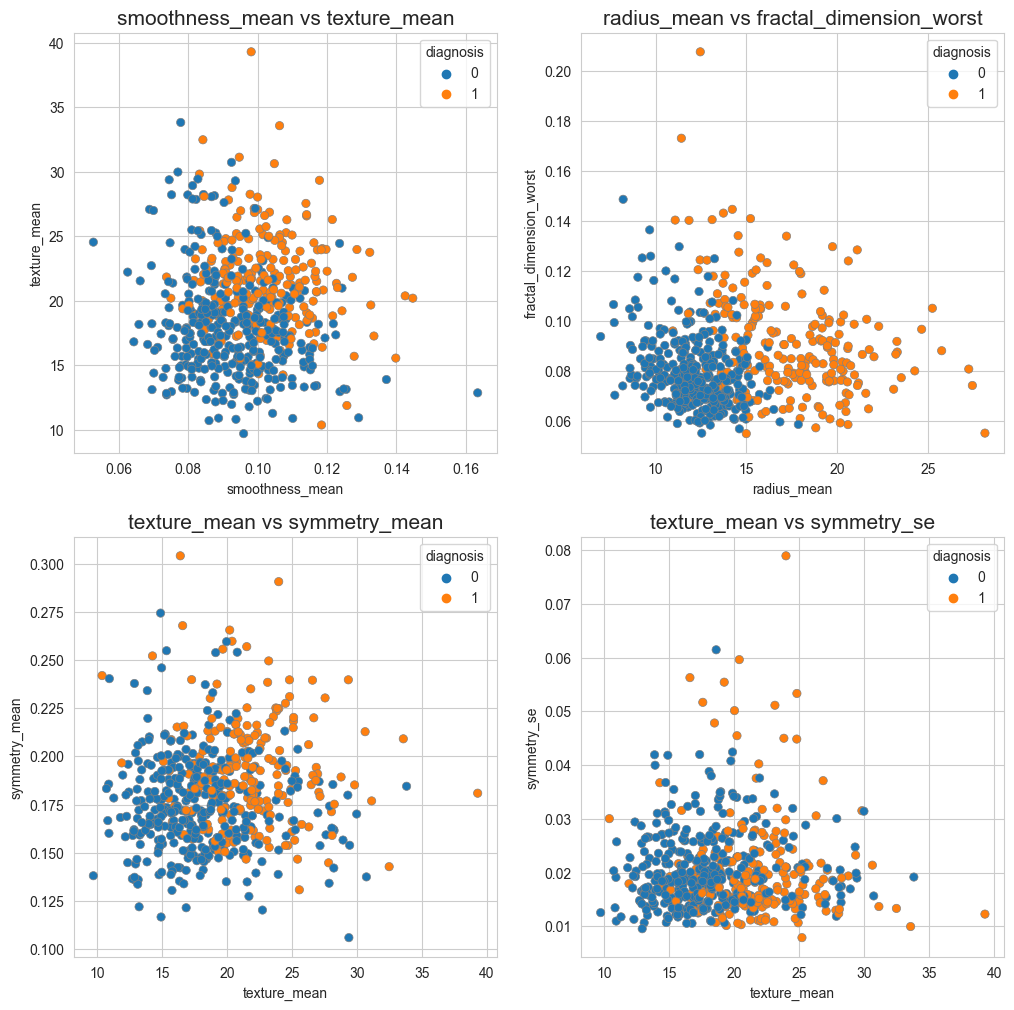

In [37]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

## 3. Data Preprocessing

### Goal:
We need to find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 


## 3.1 Statistical Analysis(Outliers Detection)

> ### Remove Outliers Using IQR

In [38]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [39]:
df.loc[Outliers_to_drop]

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
9,9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,...,15.090,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.2075
14,14,84667401,1,13.730,22.61,93.60,578.3,0.11310,0.2293,0.2128,...,15.030,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.1431
15,15,84799002,1,14.540,27.54,96.73,658.8,0.11390,0.1595,0.1639,...,17.460,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.1341
151,151,871001502,0,8.219,20.70,53.27,203.9,0.09405,0.1305,0.1321,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,907914,1,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,...,16.350,27.57,125.40,832.7,0.1419,0.7090,0.9019,0.24750,0.2866,0.1155
465,465,9113239,0,13.240,20.13,86.87,542.9,0.08284,0.1223,0.1010,...,15.440,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.13570,0.2845,0.1249
485,485,913063,0,12.450,16.41,82.85,476.7,0.09514,0.1511,0.1544,...,13.780,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.13420,0.3231,0.1034
242,242,883852,0,11.300,18.19,73.93,389.4,0.09592,0.1325,0.1548,...,12.580,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.12180,0.3308,0.1297


#### Label encoding
We assign the 30 features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

In [40]:
df = pd.read_csv('clean-data.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)
#data.head()

In [41]:
#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,1:31]
y = array[:,0]

In [42]:
#transform the class labels from their original string representation (M and B) into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

> *After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively*, illustrated by calling the transform method of LabelEncorder on two dummy variables.


#### Assesing Model Accuracy: Split data into training and test sets

* Split the available data into a training set and a testing set. (70% training, 30% test)
* Train the algorithm on the first part,
* make predictions on the second part,
* evaluate the predictions against the expected results. 

In [43]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state = 7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

### 3.2 Feature Standardization

* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

In [44]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

### Feature decomposition using Principal Component Analysis(PCA)

> From the pair plot, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible when working with only 2 dimensions. We will use PCA

In [45]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components = 10)
fit = pca.fit(Xs)

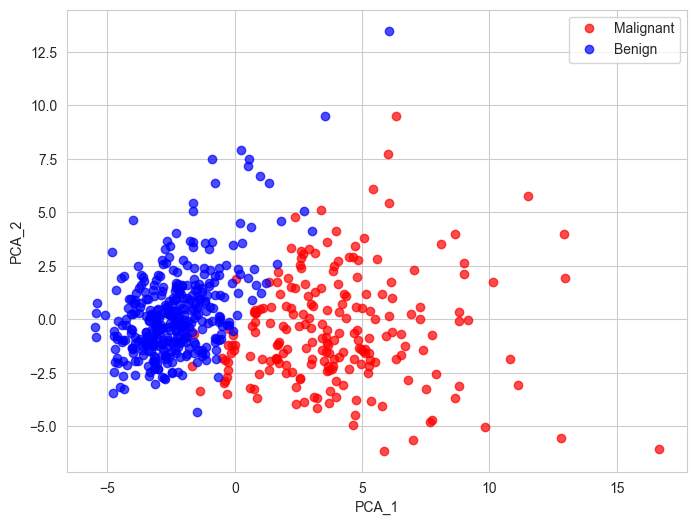

In [46]:
dff = pd.read_csv('Breast Cancer.csv', index_col=False)

X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][dff.diagnosis == 'M'],PCA_df['PCA_2'][dff.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][dff.diagnosis == 'B'],PCA_df['PCA_2'][dff.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.

### Deciding How Many Principal Components to Retain

> First we will summarise the results of a principal components analysis by making a scree plot. 

In [47]:
#The amount of variance that each PC explains
var = pca.explained_variance_ratio_

In [48]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[45.7  63.43 72.37 79.   84.46 88.46 90.43 92.03 93.38 94.55]


In [49]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

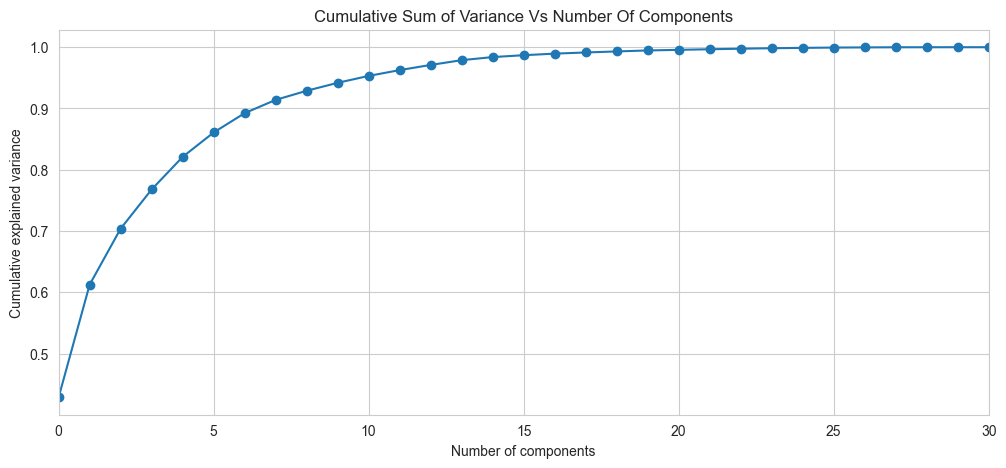

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [51]:
pca.explained_variance_ratio_

array([4.28647013e-01, 1.83767915e-01, 9.14643564e-02, 6.39147476e-02,
       5.31875905e-02, 3.98281519e-02, 3.15572013e-02, 2.16694506e-02,
       1.48642719e-02, 1.30042934e-02, 1.12630637e-02, 9.48033657e-03,
       8.42409435e-03, 7.78484562e-03, 5.06366610e-03, 3.03640406e-03,
       2.57451447e-03, 1.90471846e-03, 1.69649015e-03, 1.58457831e-03,
       1.00228336e-03, 9.65845343e-04, 8.84855607e-04, 7.82226523e-04,
       5.81914867e-04, 4.99346119e-04, 2.63603188e-04, 2.22519447e-04,
       5.12689531e-05, 2.41411630e-05, 4.29161956e-06])

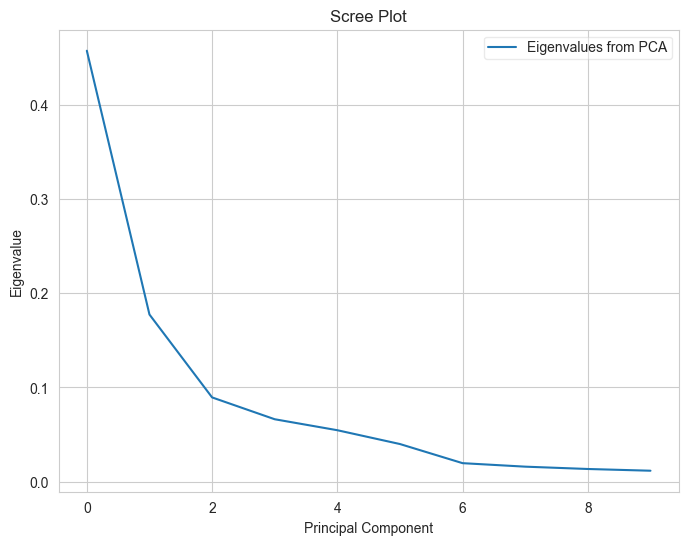

In [52]:
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc = 'best', borderpad = 0.3, shadow = False, markerscale = 0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

> #### Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

## 4. Predictive model using Support Vector Machine (SVM)

> ### Building Feature Set
> -  Preparing data for model building and checking. 30 percent of data is kept aside for validation purposes. We will also be performing scaling of data using sklearn's MinMaxScaler.

In [53]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [54]:
from sklearn import metrics

def plot_confusion_metrix(y_test, model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign', 'Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
    plt.show()

In [55]:
from sklearn.metrics import roc_curve, auc

def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

In [56]:
def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

In [57]:
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test, pred)
    print("\nAcuuracy Of the Model: ", accu, "\n\n")

On linear kernel: 


Confusion Matrix:
[[106   2]
 [  2  61]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



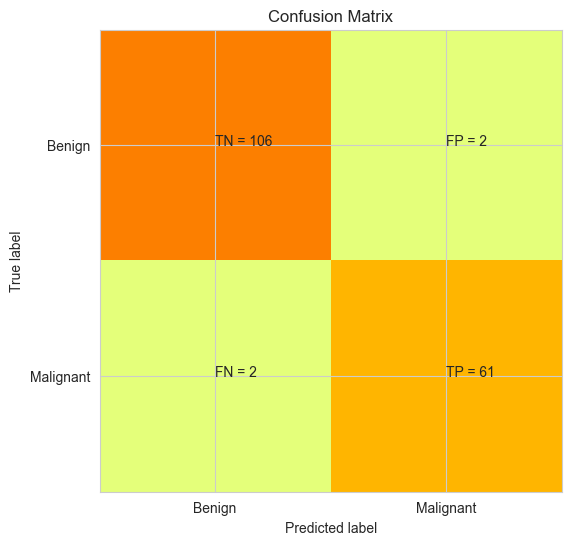

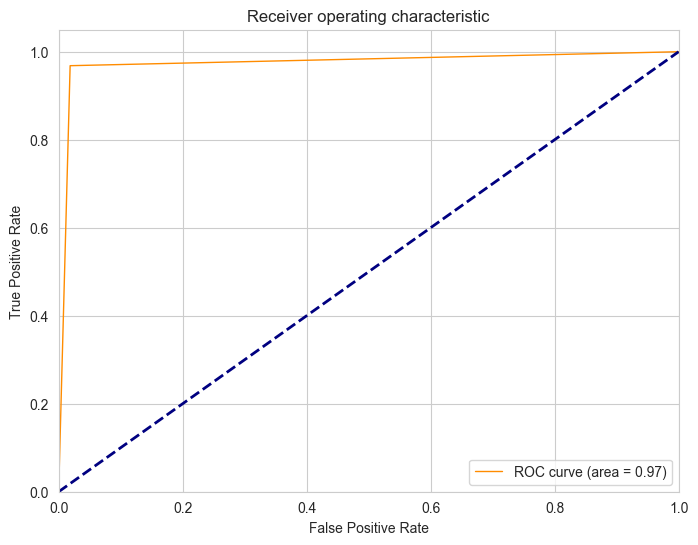


Acuuracy Of the Model:  0.9766081871345029 


On rbf kernel: 


Confusion Matrix:
[[106   2]
 [  2  61]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



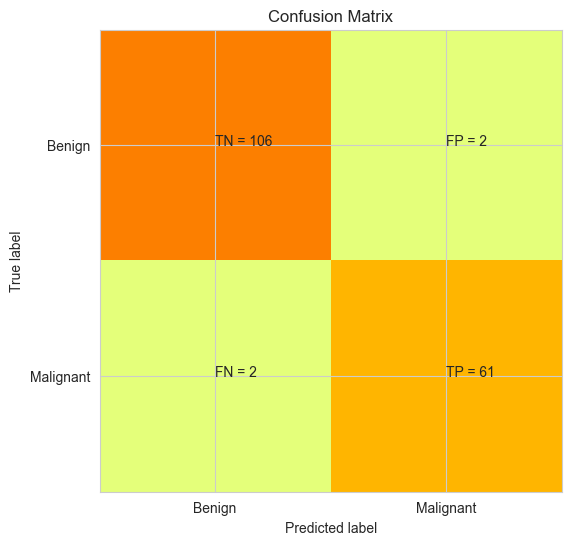

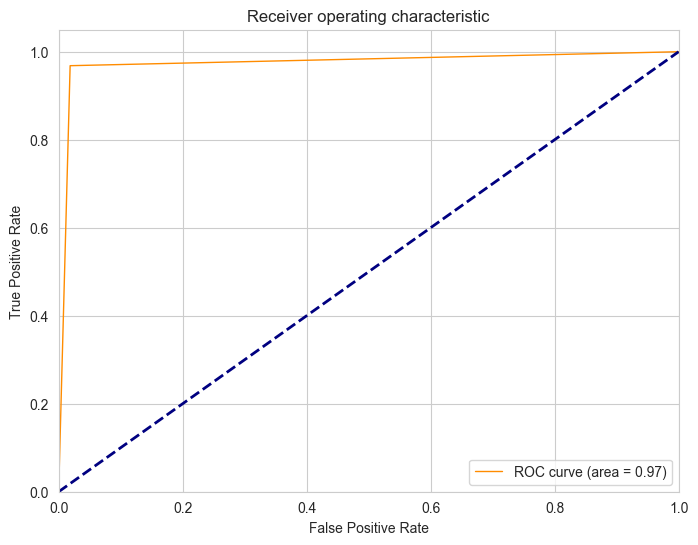


Acuuracy Of the Model:  0.9766081871345029 




In [58]:
for i in ['linear', 'rbf']:
    clf = SVC(kernel = i)
    clf.fit(X_train, y_train)
    
    print("On "+ i + " kernel: " )
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

### Kernel Selection Using Learning Curve

The plot_learning_curve function is a ready block of code from <a href = https://scikit-learn.org/0.18/auto_examples/model_selection/plot_learning_curve.html>URL</a> to help me plot the learning curve

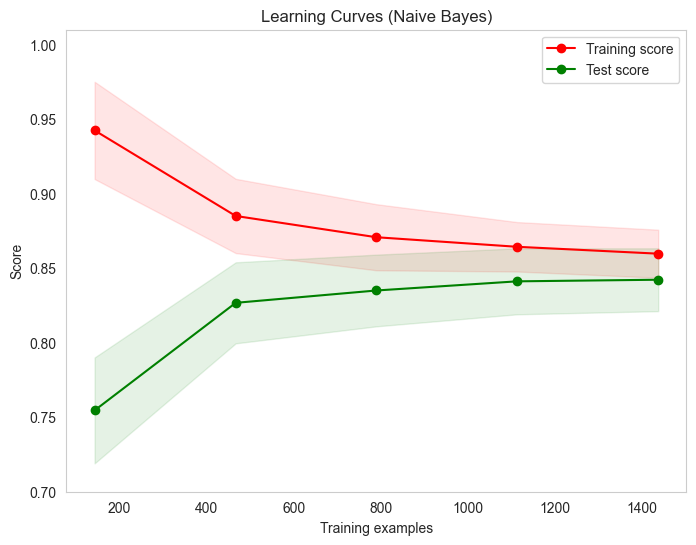

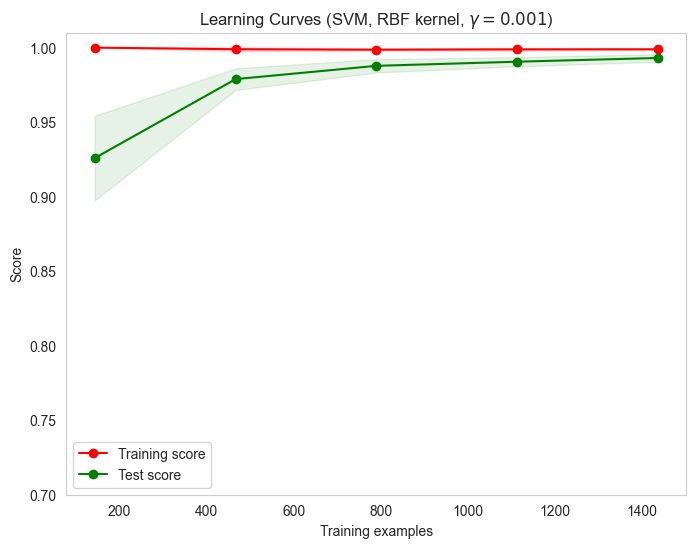

In [59]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\Admin123\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

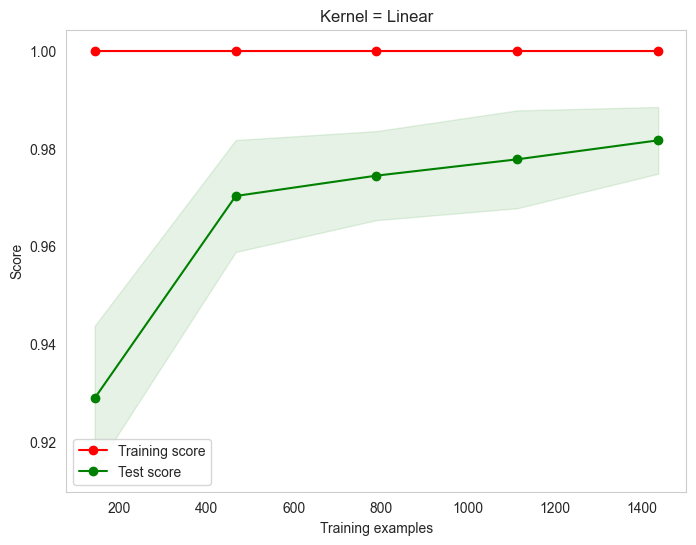

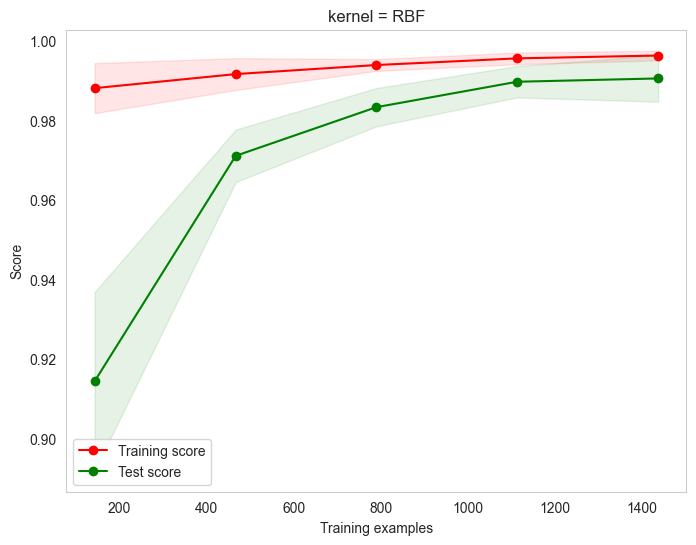

In [60]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
plot_learning_curve(estimator, 'Kernel = Linear', X, y, cv=cv)
estimator = SVC(kernel='rbf')
plot_learning_curve(estimator, 'kernel = RBF', X, y, cv=cv)

> #### Selection of Regularization parameter(C)
> - C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize the classifier to unseen data. Consider the objective function of a linear SVM 

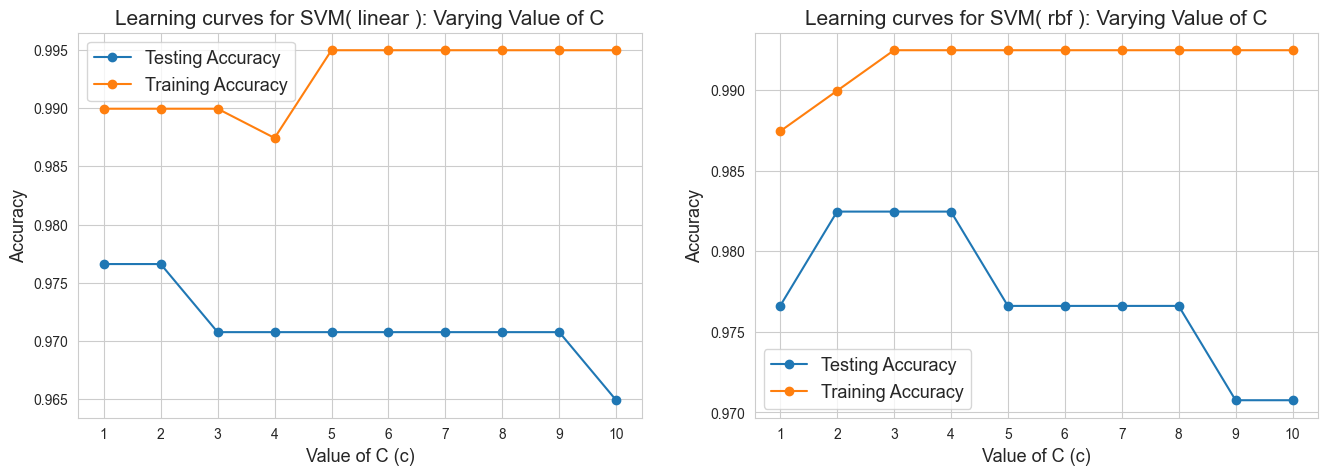

In [61]:
fig = plt.figure(figsize = (16,5))
def plotlc(kernel = None, k = 0):
    plt.subplot(k)
    cp = np.arange(1, 11)
    train_accuracy = np.empty(len(cp))
    test_accuracy = np.empty(len(cp))
    for i, c in enumerate(cp):
        clf = SVC(C = c,kernel = kernel)
        clf.fit(X_train, y_train)
        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

    plt.title('Learning curves for SVM( '+ kernel+' ): Varying Value of C', size=15)
    plt.plot(cp, test_accuracy, marker ='o', label = 'Testing Accuracy')
    plt.plot(cp, train_accuracy, marker ='o', label = 'Training Accuracy')
    plt.legend(prop={'size':13})
    plt.xlabel('Value of C (c)', size=13)
    plt.ylabel('Accuracy', size=13)
    plt.xticks(cp);

plotlc('linear',121)
plotlc('rbf',122)



Confusion Matrix:
[[106   2]
 [  2  61]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



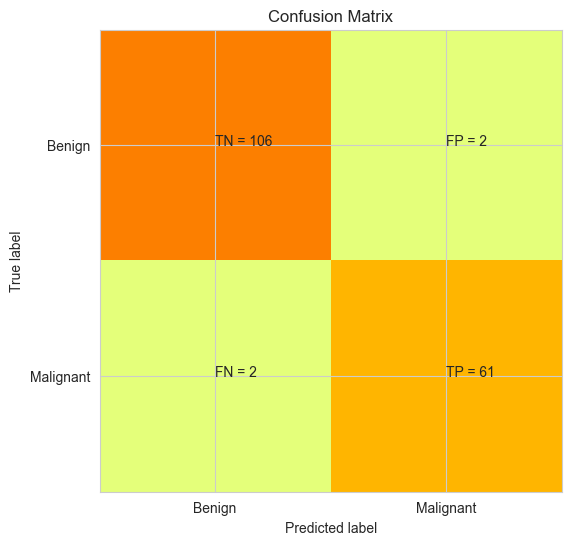

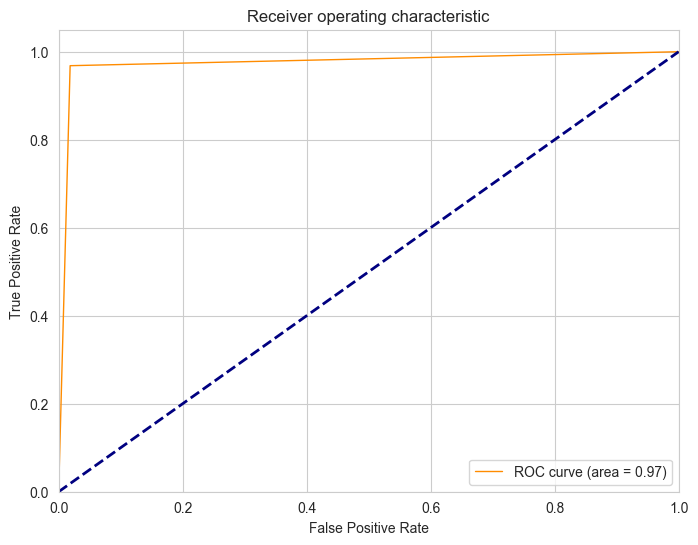


Acuuracy Of the Model:  0.9766081871345029 




In [62]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train,y_train)
report_performance(clf)
roc_curves(clf)
accuracy(clf)